## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
pharma_df = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID"])
# sample the heading after merge
pharma_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [53]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


In [2]:
# set the index to the regimen
pharma_indexed = pharma_df.set_index(['Drug Regimen'])

#build an group for each Regimen
tumor_mean = pharma_indexed.groupby("Drug Regimen")['Tumor Volume (mm3)'].mean()
pharma_indexed['Tumor Mean'] = tumor_mean
tumor_median = pharma_indexed.groupby("Drug Regimen")['Tumor Volume (mm3)'].median()
pharma_indexed['Tumor Median'] = tumor_median
tumor_variance = pharma_indexed.groupby("Drug Regimen")['Tumor Volume (mm3)'].var()
pharma_indexed['Tumor Variance'] = tumor_variance
tumor_standard = pharma_indexed.groupby("Drug Regimen")['Tumor Volume (mm3)'].std()
pharma_indexed['Tumor Std. Deviation'] = tumor_standard
tumor_SEM = pharma_indexed.groupby("Drug Regimen")['Tumor Volume (mm3)'].sem()
pharma_indexed['Tumor SEM'] = tumor_SEM

# Build a dataframe to put all this in
newpharma_df = pd.DataFrame({"Tumor Mean":tumor_mean,
                             "Tumor Median":tumor_median,
                             "Tumor Variance":tumor_variance, 
                             "Tumor Std. Dev.":tumor_standard, 
                             "Tumor SEM":tumor_SEM })

newpharma_df

,Tumor Mean,Tumor Median,Tumor Variance,Tumor Std. Dev.,Tumor SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

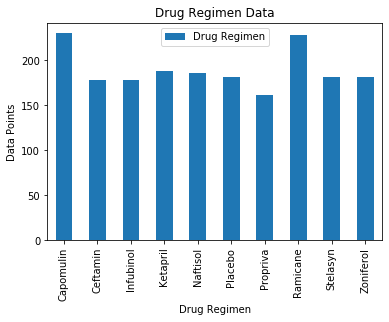

In [3]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

bardata_df = pharma_df.groupby(['Drug Regimen'])
bardata_value = pd.DataFrame(bardata_df["Drug Regimen"].count())
bardata_value
bardata_value.plot(kind = "bar", title = "Drug Regimen Data")
plt.ylabel('Data Points')
plt.show()

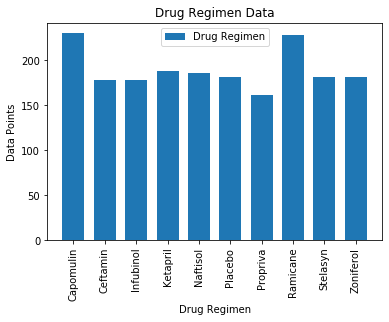

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
x_axis = np.arange(len(bardata_value))
x_axis_ticks = [values for values in x_axis]
plt.bar(x_axis, bardata_value["Drug Regimen"], align="center", width=0.7)
plt.xticks(x_axis_ticks, list(bardata_value.index), rotation="vertical")
label = ["Drug Regimen"] 
plt.legend(label, loc="upper center")
plt.title("Drug Regimen Data")
plt.xlabel("Drug Regimen")
plt.ylabel("Data Points")
plt.show()


## Pie plots

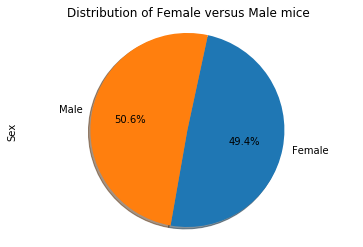

In [5]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
genderlist = pharma_df.groupby("Sex")
gender_df = pd.DataFrame(genderlist["Sex"].count())
gender_df.plot(kind="pie", y="Sex", title="Distribution of Female versus Male mice", 
autopct="%1.1f%%", startangle=260, shadow= True, legend=False)
plt.axis("equal")
plt.show()

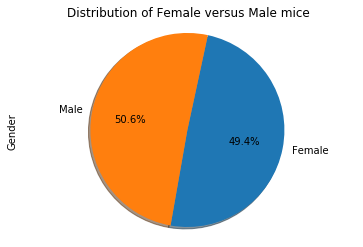

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_df['Sex'], labels=list(gender_df.index.values), autopct="%1.1f%%", startangle=260, shadow = True)
plt.axis("equal")
plt.title("Distribution of Female versus Male mice")
plt.ylabel("Gender")
plt.show()

## Quartiles, outliers and boxplots

In [7]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens.
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Grab the first regimen. CAPOMULIN
cap_df = pharma_df.loc[pharma_df['Drug Regimen'] == 'Capomulin',:] 
cap_time = cap_df.groupby('Mouse ID').max()['Timepoint']
cap_time_df = pd.DataFrame(cap_time)
cap_best_time = pd.merge(cap_time_df, pharma_df, on=('Mouse ID','Timepoint'), how='left')
cap_tumor_size = cap_best_time["Tumor Volume (mm3)"]
cap_tumor_size
cap_quartiles = cap_tumor_size.quantile([.25,.5,.75])
cap_lower_quartile = cap_quartiles[0.25]
cap_upper_quartile = cap_quartiles[0.75]
cap_iqr = cap_upper_quartile - cap_lower_quartile
cap_lower_boundry = cap_lower_quartile - (1.5*cap_iqr)
cap_upper_boundry = cap_upper_quartile + (1.5*cap_iqr)
print(f"Potential Outliers could be values below {(cap_lower_boundry):.3f} or above. {(cap_upper_boundry):.3f}")

Potential Outliers could be values below 20.705 or above. 51.832


In [8]:
# Grab the first regimen. Ramicane
ram_df = pharma_df.loc[pharma_df['Drug Regimen'] == 'Ramicane',:] 
ram_time = ram_df.groupby('Mouse ID').max()['Timepoint']
ram_time_df = pd.DataFrame(ram_time)
ram_best_time = pd.merge(ram_time_df, pharma_df, on=('Mouse ID','Timepoint'), how='left')
ram_tumor_size = ram_best_time["Tumor Volume (mm3)"]
ram_tumor_size
ram_quartiles = ram_tumor_size.quantile([.25,.5,.75])
ram_lower_quartile = ram_quartiles[0.25]
ram_upper_quartile = ram_quartiles[0.75]
ram_iqr = ram_upper_quartile - ram_lower_quartile
ram_lower_boundry = ram_lower_quartile - (1.5*ram_iqr)
ram_upper_boundry = ram_upper_quartile + (1.5*ram_iqr)
print(f"Potential Outliers could be values below {(ram_lower_boundry):.3f} or above. {(ram_upper_boundry):.3f}")

Potential Outliers could be values below 17.913 or above. 54.307


In [9]:
# Grab the first regimen. Infubinol
inf_df = pharma_df.loc[pharma_df['Drug Regimen'] == 'Infubinol',:] 
inf_time = inf_df.groupby('Mouse ID').max()['Timepoint']
inf_time_df = pd.DataFrame(inf_time)
inf_best_time = pd.merge(inf_time_df, pharma_df, on=('Mouse ID','Timepoint'), how='left')
inf_tumor_size = inf_best_time["Tumor Volume (mm3)"]
inf_tumor_size
inf_quartiles = inf_tumor_size.quantile([.25,.5,.75])
inf_lower_quartile = inf_quartiles[0.25]
inf_upper_quartile = inf_quartiles[0.75]
inf_iqr = inf_upper_quartile - inf_lower_quartile
inf_lower_boundry = inf_lower_quartile - (1.5*inf_iqr)
inf_upper_boundry = inf_upper_quartile + (1.5*inf_iqr)
print(f"Potential Outliers could be values below {(inf_lower_boundry):.3f} or above. {(inf_upper_boundry):.3f}")

Potential Outliers could be values below 36.833 or above. 82.741


In [10]:
# Grab the first regimen. Ceftamin
cef_df = pharma_df.loc[pharma_df['Drug Regimen'] == 'Ceftamin',:] 
cef_time = cef_df.groupby('Mouse ID').max()['Timepoint']
cef_time_df = pd.DataFrame(cef_time)
cef_best_time = pd.merge(cef_time_df, pharma_df, on=('Mouse ID','Timepoint'), how='left')
cef_tumor_size = cef_best_time["Tumor Volume (mm3)"]
cef_tumor_size
cef_quartiles = cef_tumor_size.quantile([.25,.5,.75])
cef_lower_quartile = cef_quartiles[0.25]
cef_upper_quartile = cef_quartiles[0.75]
cef_iqr = cef_upper_quartile - cef_lower_quartile
cef_lower_boundry = cef_lower_quartile - (1.5*cef_iqr)
cef_upper_boundry = cef_upper_quartile + (1.5*cef_iqr)
print(f"Potential Outliers for Capomulin could be values below {(cap_lower_boundry):.3f} or above. {(cap_upper_boundry):.3f}")
print(f"Potential Outliers for Ramicane could be values below {(ram_lower_boundry):.3f} or above. {(ram_upper_boundry):.3f}")
print(f"Potential Outliers for Infubinol could be values below {(inf_lower_boundry):.3f} or above. {(inf_upper_boundry):.3f}")
print(f"Potential Outliers for Ceftamin could be values below {(cef_lower_boundry):.3f} or above. {(cef_upper_boundry):.3f}")


Potential Outliers for Capomulin could be values below 20.705 or above. 51.832
Potential Outliers for Ramicane could be values below 17.913 or above. 54.307
Potential Outliers for Infubinol could be values below 36.833 or above. 82.741
Potential Outliers for Ceftamin could be values below 25.355 or above. 87.666


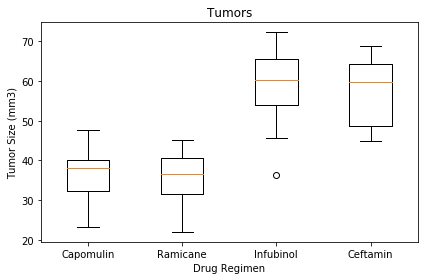

In [11]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
dataPlot = [cap_tumor_size, ram_tumor_size, inf_tumor_size, cef_tumor_size]
fig1, ax1 = plt.subplots()
ax1.set_title('Tumors')
ax1.set_ylabel('Tumor Size (mm3)')
ax1.set_xlabel('Drug Regimen')

ax1.boxplot(dataPlot, labels=["Capomulin","Ramicane","Infubinol","Ceftamin",])
plt.tight_layout()
plt.show()

## Line and scatter plots

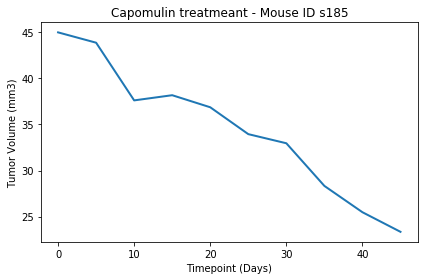

In [12]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
cap_line = cap_df.loc[cap_df['Mouse ID'] == 's185']
cap_x_axis = cap_line['Timepoint']
tumor_volume = cap_line['Tumor Volume (mm3)']

plt.title('Capomulin treatmeant - Mouse ID s185')
plt.plot(cap_x_axis, tumor_volume ,linewidth=2, markersize=12)
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.tight_layout()
plt.show()


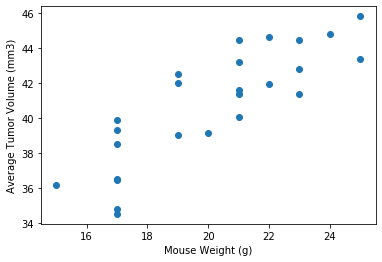

In [13]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
avg_tumor = cap_df.groupby(['Mouse ID']).mean()
plt.scatter(avg_tumor['Weight (g)'],avg_tumor['Tumor Volume (mm3)'])
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

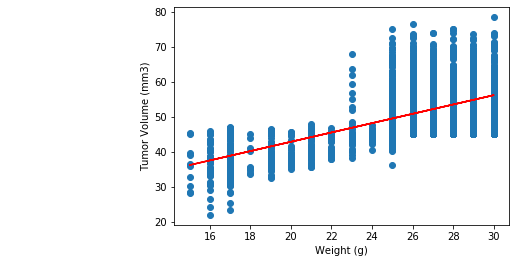

In [19]:
# Correlation between the weight and tumor volume.
# Add the linear regression equation and line to plot
x_values = pharma_df['Weight (g)']
y_values = pharma_df['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()
